# **BANK CUSTOMER CHURN MODEL**

---



## **Objective**

1.   Data Encoding
2.   Feature Scaling
3.   Utilising Classification Models
      *   Logistic Regression
      *   Random Forest Model
3.   Data Visualisation
      *   Histograms
      *   Heatmap







## **Data Source**
Github YBI Foundation
https://github.com/YBIFoundation/Dataset

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

## **Import Data**

In [ ]:
df= pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

## **Describing Data**

In [ ]:
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df=df.drop(columns=['CustomerId','Surname'])
#removing unwanted data

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

## **Data Encoding**

In [ ]:
df=pd.get_dummies(data=df,drop_first=True)
#using encoding to covert categorical variable to binary vectors.

In [ ]:
df.head(3)

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False


<Axes: ylabel='Frequency'>

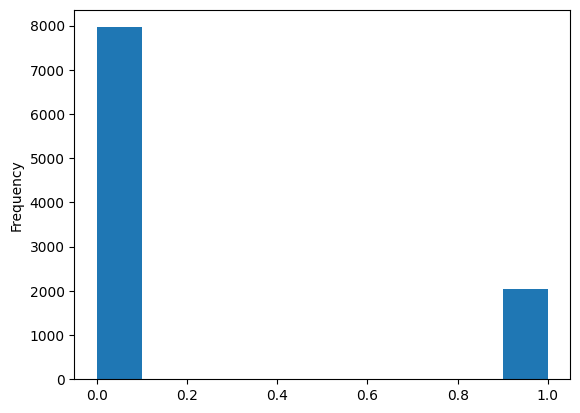

In [ ]:
df.Churn.plot.hist()

*Graph shows us Customer Churned~ 2000 and Customer Not Churned~ 8000.*

In [ ]:
print("Churned: ")
(df.Churn==1).sum()

Churned: 


2037

## **Data Visualisation**

In [ ]:
df2=df.drop(columns='Churn')
#separating churn column

<Axes: title={'center': 'Correlated with Churn Column'}>

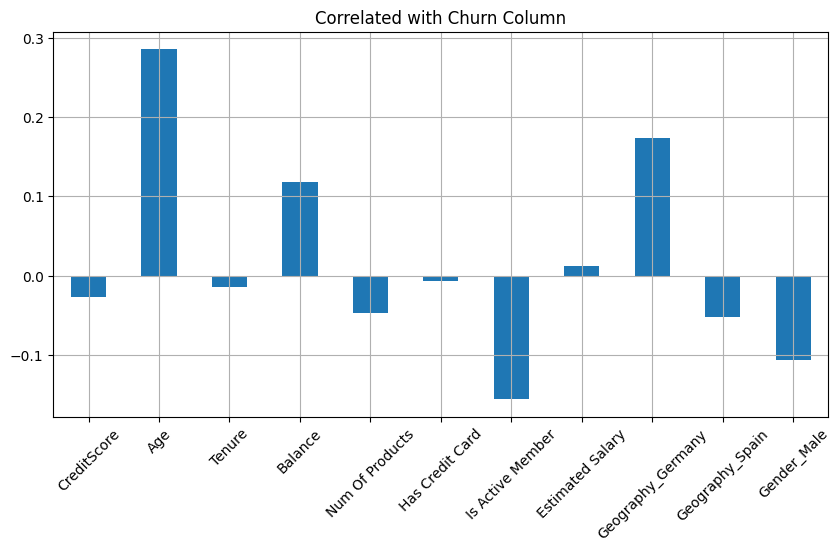

In [ ]:
df2.corrwith(df['Churn']).plot.bar(figsize=(10,5),title="Correlated with Churn Column",rot=45,grid=True)
#correlating "Churn" with rest of the columns.

*According to this graph Churn is mostly Correlated with "Age", "Balance" and "Geography Germany"*

In [ ]:
corr=df.corr()

<Axes: >

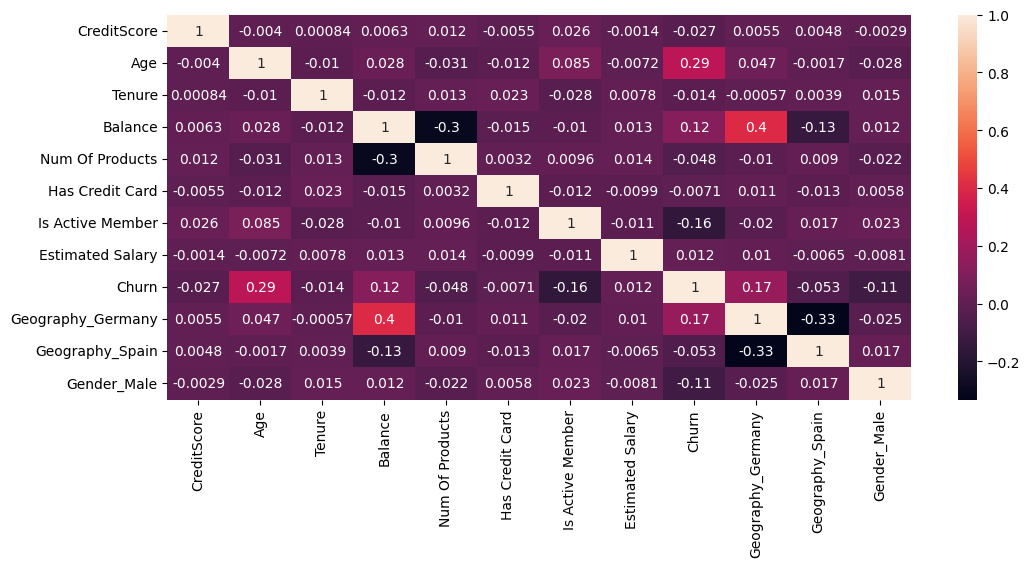

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot=True)

*According to this Heatmap "Churn" is mostly Correlated with "Age", "Balance" and "Geography Germany"*

## **Defining Variables**

In [ ]:
x=df.drop(columns='Churn')
y=df['Churn']

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2529)

In [ ]:
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((2000, 11), (8000, 11), (2000,), (8000,))

## **Standardising Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_train

array([[ 0.27712856,  3.16278324,  1.02543924, ..., -0.57773517,
        -0.57658047, -1.0941657 ],
       [-0.15484626,  1.82609506, -1.38513071, ..., -0.57773517,
        -0.57658047, -1.0941657 ],
       [-0.08285046, -0.84728128,  1.02543924, ...,  1.73089688,
        -0.57658047,  0.91393836],
       ...,
       [ 1.6861893 , -0.94275901, -1.38513071, ...,  1.73089688,
        -0.57658047,  0.91393836],
       [-0.47368482, -0.36989265,  0.6810721 , ..., -0.57773517,
         1.73436329, -1.0941657 ],
       [-0.15484626,  0.39392917,  1.71417351, ..., -0.57773517,
        -0.57658047,  0.91393836]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

## **Model Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score,precision_score,recall_score

In [ ]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [ ]:
results=pd.DataFrame([['Logistic Regression',acc,f1,prec,rec]],columns=['Model','Accuracy','F1 Score','Precision','Recall'])

In [ ]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.819,0.327138,0.624113,0.221662


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[1550   53]
 [ 309   88]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [ ]:
rf_results=pd.DataFrame([['Random Forest Classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1 Score','Precision','Recall'])

In [ ]:
results._append(rf_results,ignore_index=True)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.8190,0.327138,0.624113,0.221662
1,Random Forest Classifier,0.8715,0.593997,0.796610,0.473552


In [ ]:
df.head(3)

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False


## **Prediction**

In [ ]:
sample_obs=[[647,40,3,85000.45,2,0,0,92012.45,0,1,1]]
rf.predict(scaler.fit_transform(sample_obs))

array([0])

`# According to results in line[67], random forest classifier is more accurate than logistic regression in this scenario, therefore we will predict using random forest classifier model.`

`# The model is predicting that the sample observation will "not churn[0]".`